<a href="https://colab.research.google.com/github/Siddu123421/Lung_Cancer_detection/blob/main/Lung_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

Import the data

In [ ]:
df=pd.read_csv('/content/survey_lung_cancer.csv')

read sample of data

In [ ]:
df.head(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,MALE,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,MALE,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,FEMALE,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,MALE,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,FEMALE,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO
5,FEMALE,75,0,1,0,0,1,1,1,1,0,1,1,0,0,YES
6,MALE,52,1,0,0,0,0,1,0,1,1,1,1,0,1,YES
7,FEMALE,51,1,1,1,1,0,1,1,0,0,0,1,1,0,YES
8,FEMALE,68,1,0,1,0,0,1,0,0,0,0,0,0,0,NO
9,MALE,53,1,1,1,1,1,0,1,0,1,0,0,1,1,YES


In [ ]:
df.tail(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,FEMALE,56,0,0,0,1,1,1,0,0,1,1,1,1,0,YES
305,MALE,70,1,0,0,0,0,1,1,1,1,1,1,0,1,YES
306,MALE,58,1,0,0,0,0,0,1,1,1,1,0,0,1,YES
307,MALE,67,1,0,1,0,0,1,1,0,1,1,1,0,1,YES
308,MALE,62,0,0,0,1,0,1,1,1,1,0,0,1,0,YES


In [ ]:
df.shape

(309, 16)

In [ ]:
#checking datatypes
df.dtypes

,0
GENDER,object
AGE,int64
SMOKING,int64
YELLOW_FINGERS,int64
ANXIETY,int64
PEER_PRESSURE,int64
CHRONIC DISEASE,int64
FATIGUE,int64
ALLERGY,int64
WHEEZING,int64


In [ ]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,0.563107,0.569579,0.498382,0.501618,0.504854,0.673139,0.556634,0.556634,0.556634,0.579288,0.640777,0.469256,0.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,62.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,69.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,87.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.describe(include="object")

,GENDER,LUNG_CANCER
count,309,309
unique,2,2
top,MALE,YES
freq,162,270


In [ ]:
df.columns.tolist()

['GENDER',
 'AGE',
 'SMOKING',
 'YELLOW_FINGERS',
 'ANXIETY',
 'PEER_PRESSURE',
 'CHRONIC DISEASE',
 'FATIGUE ',
 'ALLERGY ',
 'WHEEZING',
 'ALCOHOL CONSUMING',
 'COUGHING',
 'SHORTNESS OF BREATH',
 'SWALLOWING DIFFICULTY',
 'CHEST PAIN',
 'LUNG_CANCER']

In [ ]:
df.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


check repeated rows

In [ ]:
df.duplicated().sum()

np.int64(33)

In [ ]:
#remove repeated rows
df.drop_duplicates(inplace=True)
# check that removing is done
df.duplicated().sum()

np.int64(0)

In [ ]:
df['GENDER']=df['GENDER'].replace(['M', 'F'],[0,1])
df['LUNG_CANCER']=df['LUNG_CANCER'].replace(['YES', 'NO'],[1,0])

In [ ]:
 #Patient has lung cancer = 1 , Patient not having lung cancer = 0
df['LUNG_CANCER'].unique()

array([1, 0])

In [ ]:
# Canceled=1, Not canceled= 0
df['LUNG_CANCER'].value_counts()

,count
LUNG_CANCER,
1,238
0,38


# Show value counts for each coluumn

In [ ]:
coluumns =['GENDER', 'AGE', 'SMOKING','YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']


for col in coluumns:
    d_type = df[col].dtype

    counts =df[col].value_counts()
    print(f"Counts for {col}:")
    print(counts)
    print("============================================================")

Counts for GENDER:
GENDER
MALE      142
FEMALE    134
Name: count, dtype: int64
Counts for AGE:
AGE
64    18
60    16
62    16
56    16
59    15
63    15
61    14
70    14
67    11
55    10
72    10
69    10
68     9
77     9
57     9
71     9
58     8
54     7
74     6
75     5
51     5
65     5
52     4
66     4
73     4
53     4
49     3
76     3
47     3
48     2
44     2
81     2
78     2
21     1
79     1
38     1
39     1
87     1
46     1
Name: count, dtype: int64
Counts for SMOKING:
SMOKING
1    150
0    126
Name: count, dtype: int64
Counts for YELLOW_FINGERS:
YELLOW_FINGERS
1    159
0    117
Name: count, dtype: int64
Counts for ANXIETY:
ANXIETY
0    139
1    137
Name: count, dtype: int64
Counts for PEER_PRESSURE:
PEER_PRESSURE
1    140
0    136
Name: count, dtype: int64
Counts for CHRONIC DISEASE:
CHRONIC DISEASE
1    144
0    132
Name: count, dtype: int64
Counts for FATIGUE :
FATIGUE 
1    183
0     93
Name: count, dtype: int64
Counts for ALLERGY :
ALLERGY 
1    151
0    125

# Data Visualization

Distribution of numerical columns

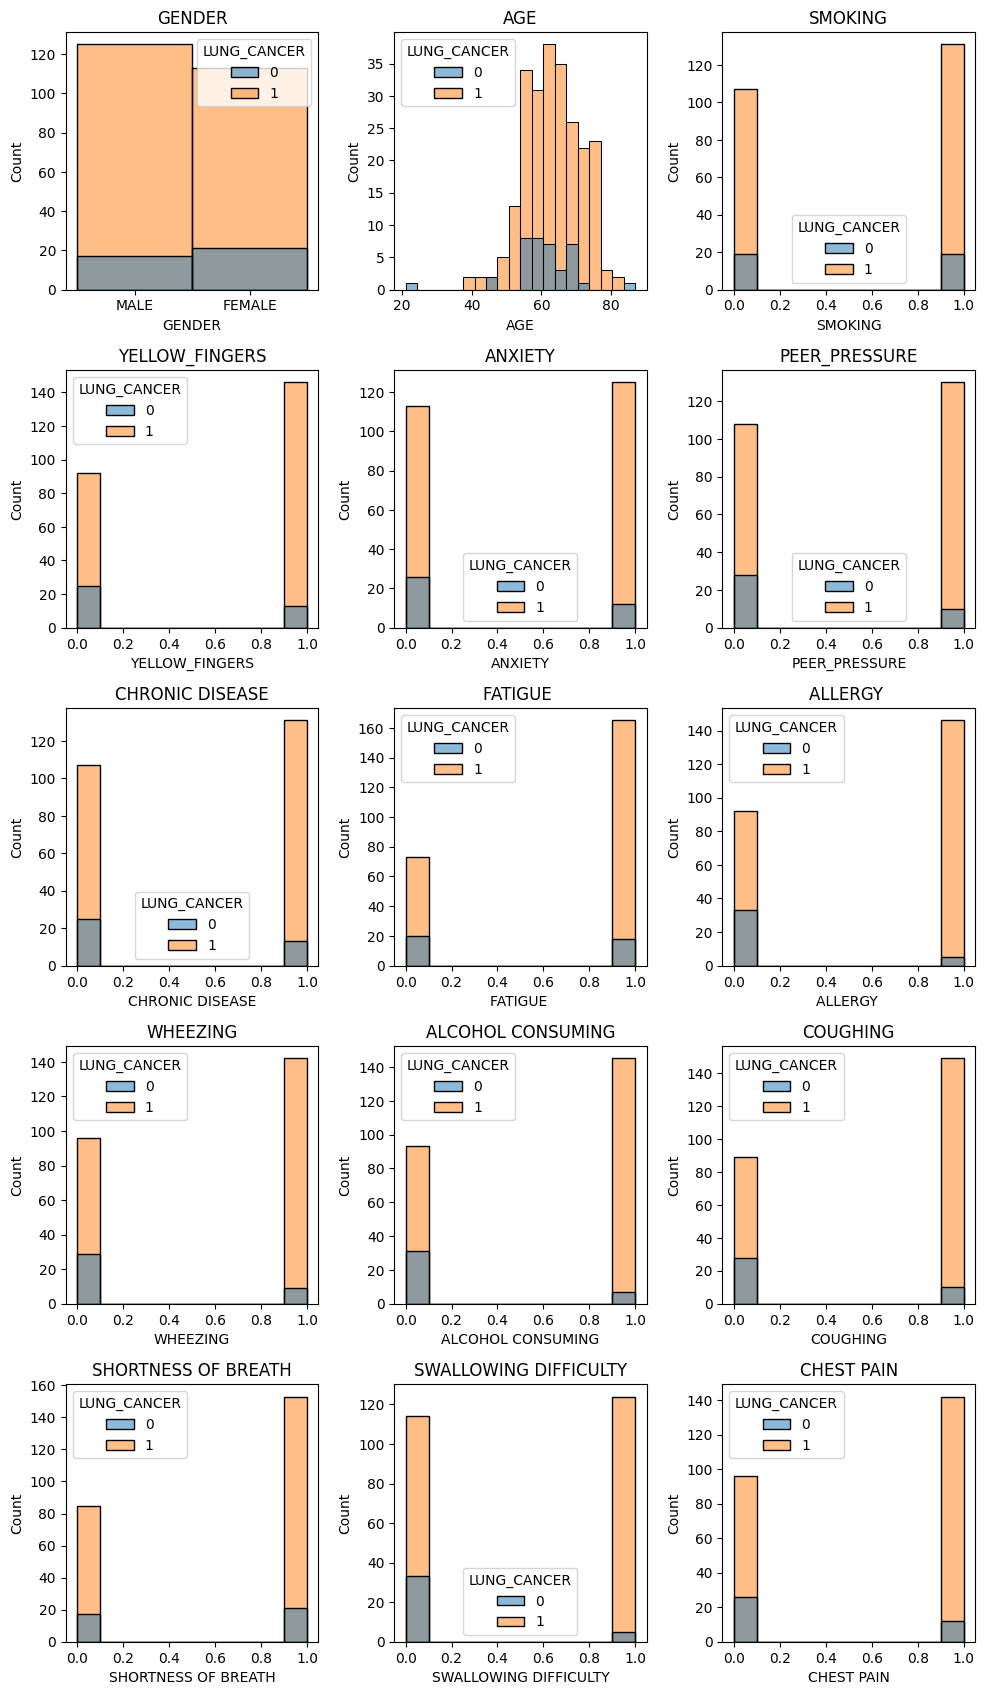

In [ ]:
num_list=['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']
fig = plt.figure(figsize=(10,20))

for i in range(len(num_list)):
    plt.subplot(6,3,i+1)
    plt.title(num_list[i])
    sns.histplot(data=df,x=df[num_list[i]],hue='LUNG_CANCER')

plt.tight_layout()

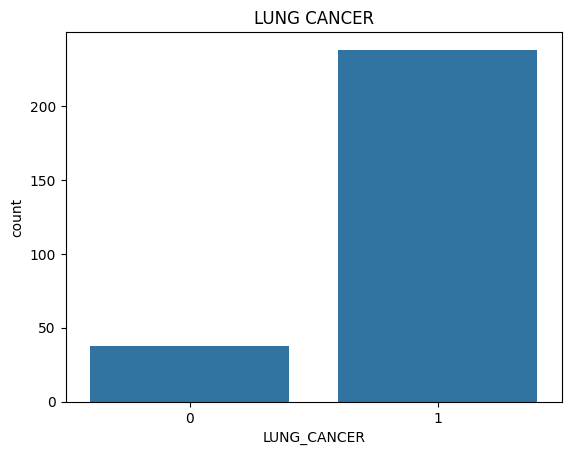

In [ ]:
#target column
sns.countplot(x=df['LUNG_CANCER'])
plt.title('LUNG CANCER');

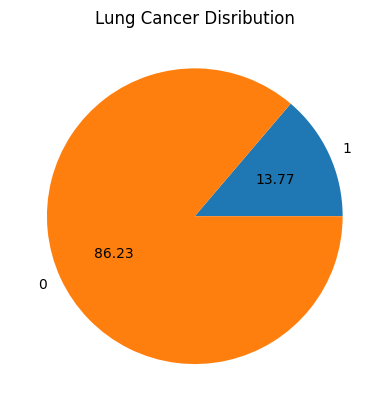

In [ ]:
#Another graph for "is_canceled" column
plt.pie(df.groupby(by=["LUNG_CANCER"]).size(), labels = df["LUNG_CANCER"].unique(), autopct = "%0.2f")
plt.title('Lung Cancer Disribution');
plt.show()

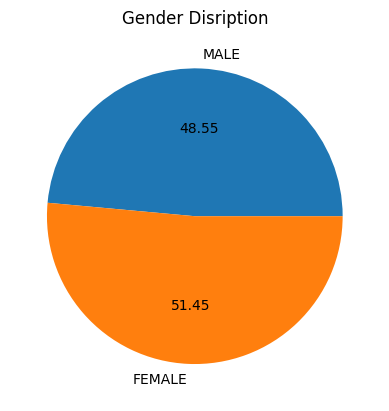

In [ ]:
plt.pie(df.groupby(by=["GENDER"]).size(), labels = df["GENDER"].unique(), autopct = "%0.2f")
plt.title('Gender Disription')
plt.show()

<Axes: xlabel='AGE', ylabel='Density'>

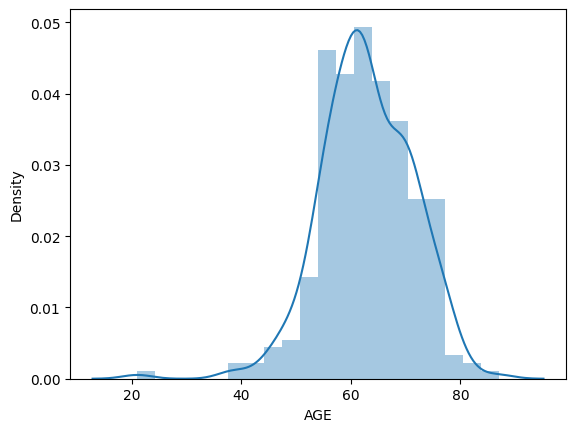

In [ ]:
sns.distplot(df['AGE'])

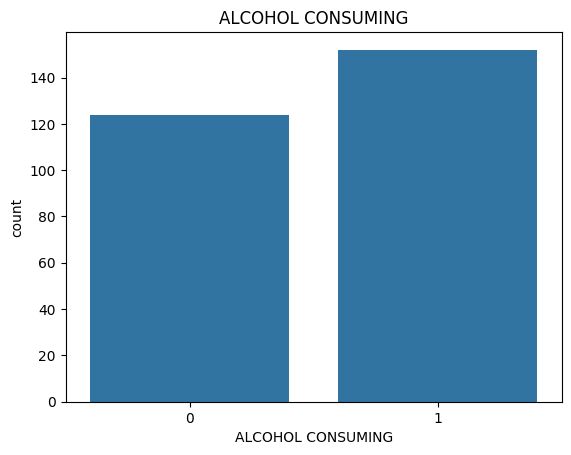

In [ ]:
sns.countplot(x=df['ALCOHOL CONSUMING'])
plt.title('ALCOHOL CONSUMING');

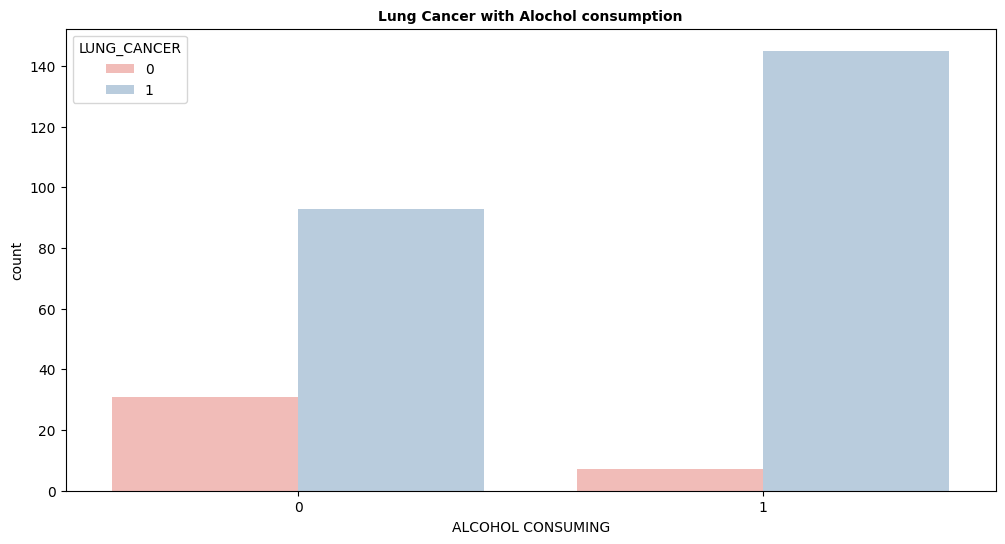

In [ ]:
plt.figure(figsize=(12, 6))

sns.countplot(x='ALCOHOL CONSUMING',hue="LUNG_CANCER", data=df,palette='Pastel1')
plt.title("Lung Cancer with Alochol consumption",fontweight="bold", size=10)
plt.show()


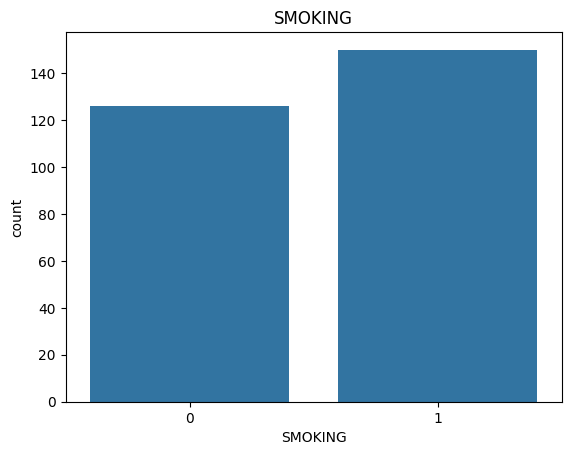

In [ ]:
sns.countplot(x=df['SMOKING'])
plt.title('SMOKING');

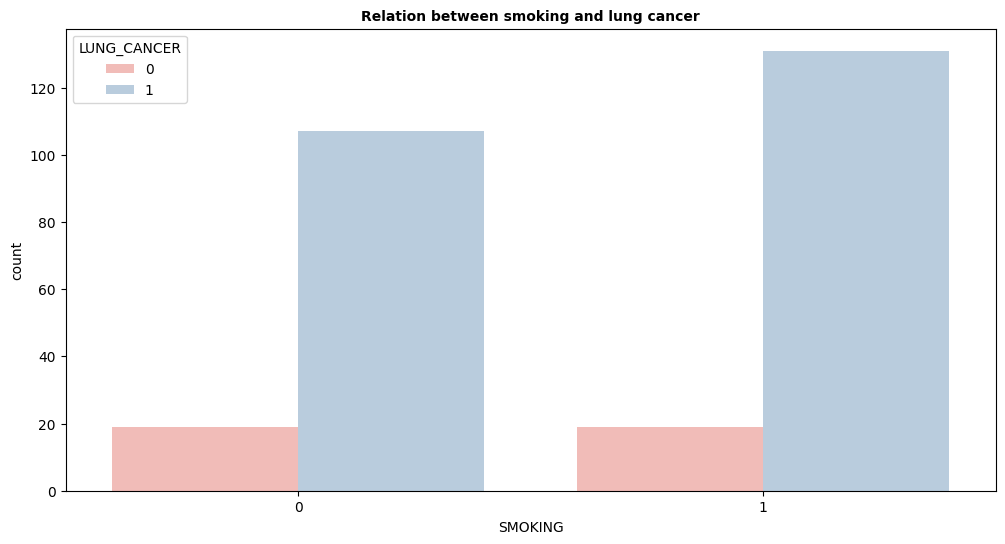

In [ ]:
plt.figure(figsize=(12, 6))

sns.countplot(x='SMOKING',hue="LUNG_CANCER", data=df,palette='Pastel1')
plt.title("Relation between smoking and lung cancer",fontweight="bold", size=10)
plt.show()


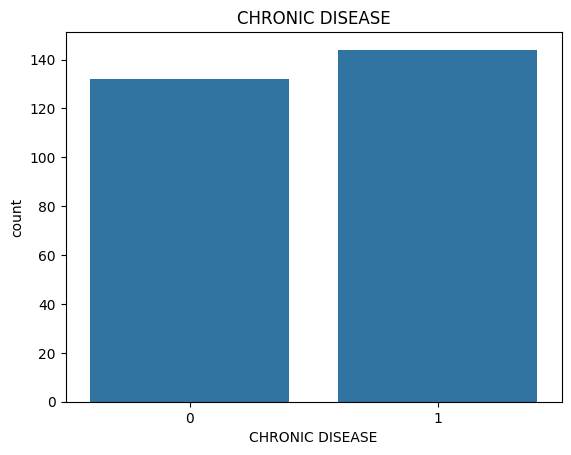

In [ ]:
sns.countplot(x=df['CHRONIC DISEASE'])
plt.title('CHRONIC DISEASE');

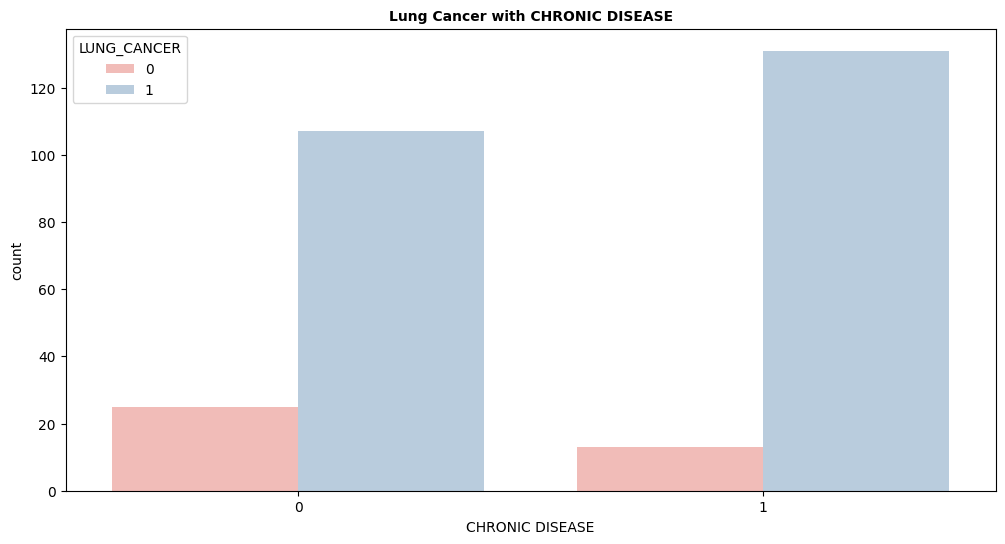

In [ ]:
plt.figure(figsize=(12, 6))

sns.countplot(x='CHRONIC DISEASE',hue="LUNG_CANCER", data=df,palette='Pastel1')
plt.title("Lung Cancer with CHRONIC DISEASE",fontweight="bold", size=10)
plt.show()


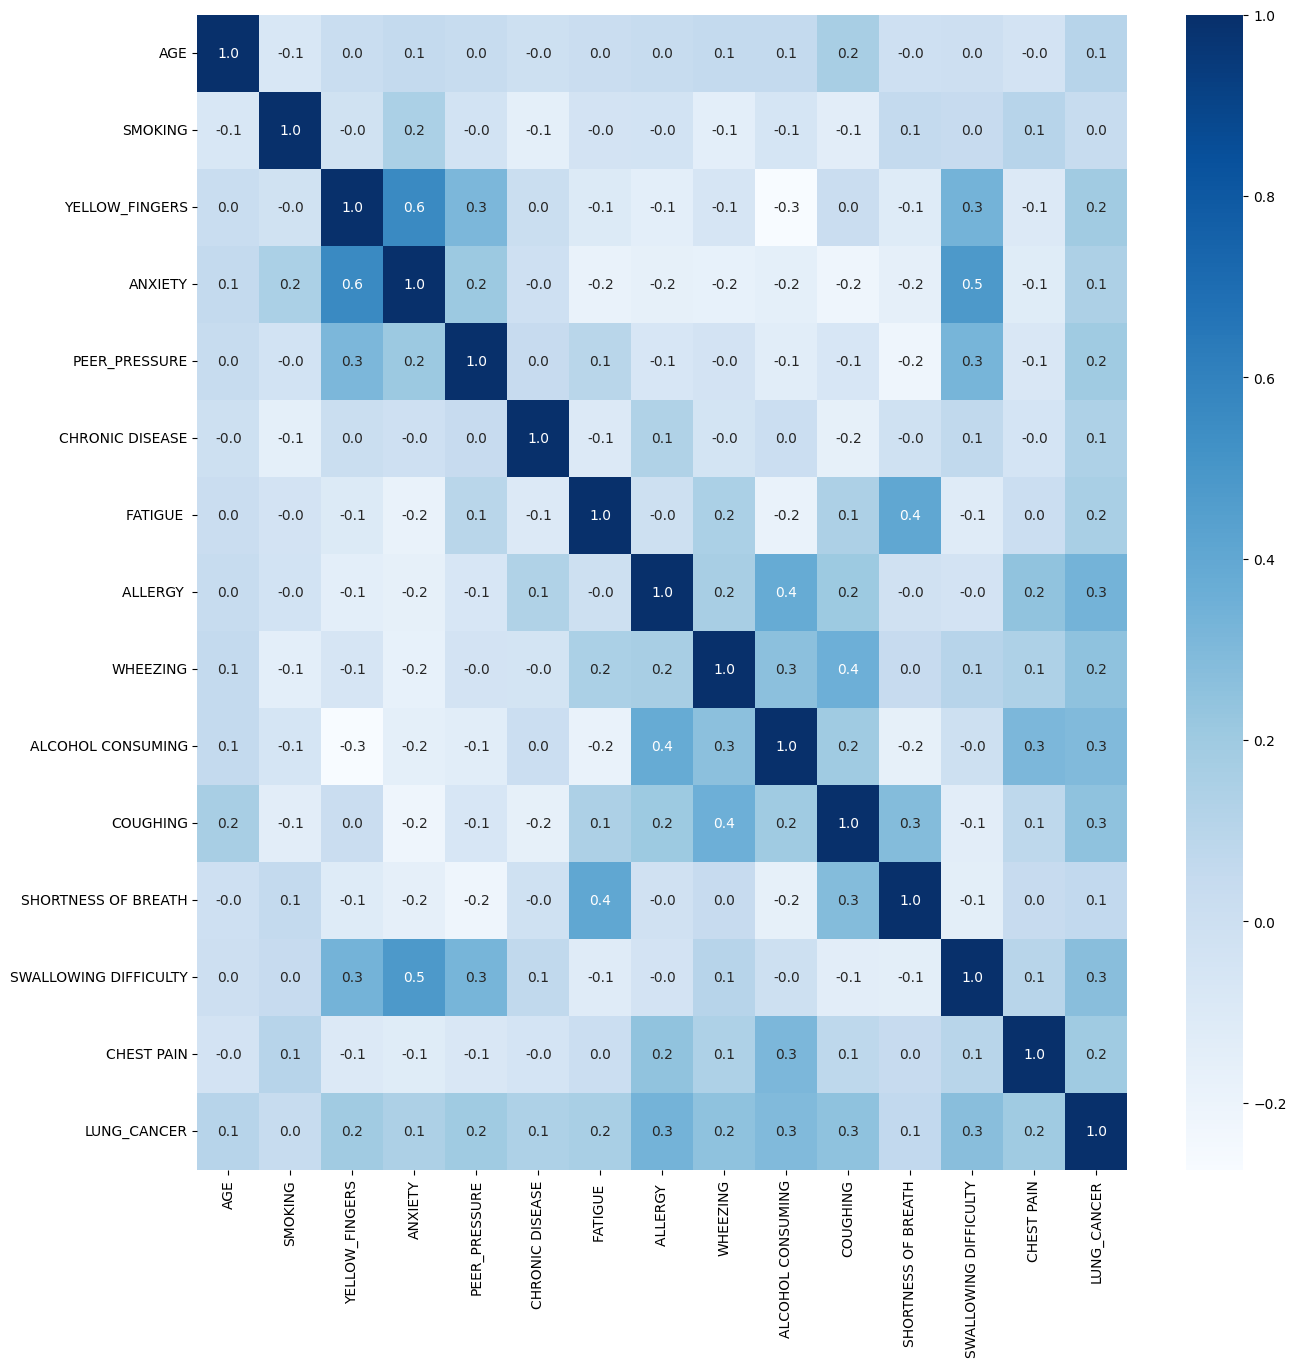

In [ ]:
plt.figure(figsize = (15,15))
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(),annot=True, cbar=True, cmap='Blues', fmt='.1f');